<a href="https://colab.research.google.com/github/linusrandu/CNN_Excercise/blob/main/CNN_MinAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"linusrandu","key":"b942f23fff91bf02cdf2f2df08f5df3b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

 97% 435M/450M [00:02<00:00, 181MB/s]
100% 450M/450M [00:03<00:00, 153MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'flowers-recognition.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_dataset(urls):
  images = []
  for url in urls:
    i = 0
    for image in os.listdir(url):
      img = cv2.imread(os.path.join(url,image))
      img = cv2.resize(img, (320,240))
      images.append(img)
      i += 1
      if i == 100:
        break

  labels = []
  for j in range(len(urls)):
    for i in range(100):
      y = j
      labels.append(y)
  return images, labels

In [ ]:
dandelion = '/content/flowers/flowers/dandelion'
rose = '/content/flowers/flowers/rose'
sunflower = '/content/flowers/flowers/sunflower'

In [ ]:
images, labels = load_dataset([dandelion, rose, sunflower])

In [ ]:
np.array(images).shape

(300, 240, 320, 3)

In [ ]:
np.array(labels).shape

(300,)

In [ ]:
def visualize_data(data):
  plt.figure(figsize = (30,30))
  for i in range(3):
    img = data[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(str(labels[100*i]))

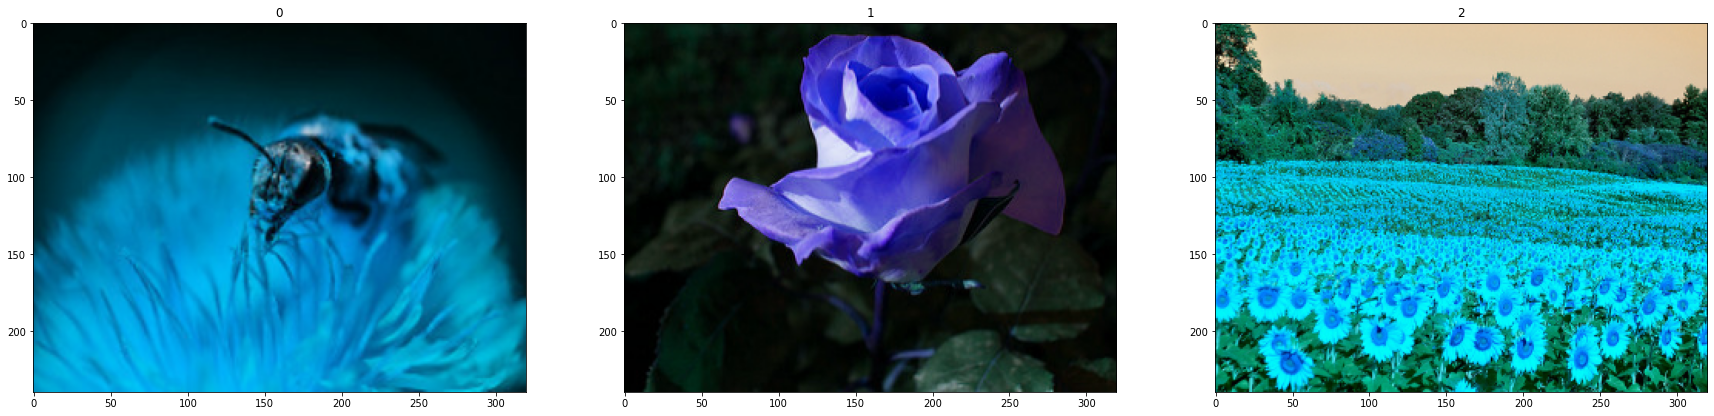

In [ ]:
visualize_data(images)

In [ ]:
from sklearn.model_selection import train_test_split as split
def train_test_split (X, Y, trainSize):
    X_train, X_test, Y_train, Y_test = split(X, Y, train_size = trainSize)
    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, 0.8)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 0.8)

In [ ]:
width = np.array(images).shape[1]
print(width)

240


In [ ]:
height = np.array(images).shape[2]
print(height)

320


In [ ]:
from keras.optimizers import Adam
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes = 3)
Y_test = to_categorical(Y_test,num_classes = 3)
Y_val = to_categorical(Y_val,num_classes = 3)

In [ ]:
alpha = 0.1
epoch = 50

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(width, height, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# Compile Model. 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=alpha),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 320, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 120, 160, 64)      256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 160, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1228800)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               314573056 
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=60,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(X_train)

In [ ]:
history2 = model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs= epoch, validation_data=(X_val,Y_val))

Epoch 1/50
3/3 [==============================] - 40s 12s/step - loss: 1.8619 - accuracy: 0.5677 - val_loss: 7.5139 - val_accuracy: 0.2917
Epoch 2/50
3/3 [==============================] - 39s 13s/step - loss: 1.7085 - accuracy: 0.5469 - val_loss: 5.2317 - val_accuracy: 0.3542
Epoch 3/50
3/3 [==============================] - 38s 13s/step - loss: 1.4258 - accuracy: 0.6302 - val_loss: 7.2665 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 36s 12s/step - loss: 1.4120 - accuracy: 0.6094 - val_loss: 9.0074 - val_accuracy: 0.2917
Epoch 5/50
3/3 [==============================] - 38s 13s/step - loss: 0.9521 - accuracy: 0.6771 - val_loss: 7.7659 - val_accuracy: 0.3542
Epoch 6/50
3/3 [==============================] - 38s 13s/step - loss: 0.9898 - accuracy: 0.6823 - val_loss: 9.6241 - val_accuracy: 0.3542
Epoch 7/50
3/3 [==============================] - 39s 13s/step - loss: 0.9103 - accuracy: 0.6510 - val_loss: 12.5354 - val_accuracy: 0.3542
Epoch 8/50
3/3 [==========

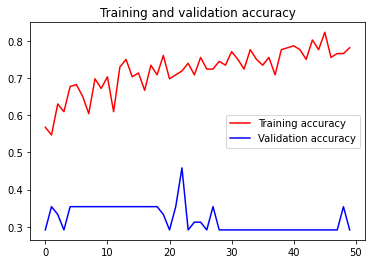

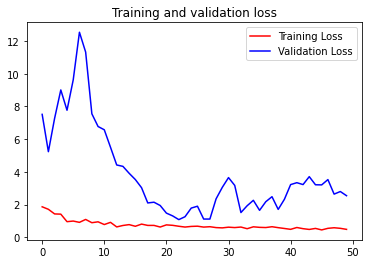

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()